In [1]:
# Modify brightness of the image performing appropriate operation.

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [20]:
img = cv2.imread("dog.jpg")

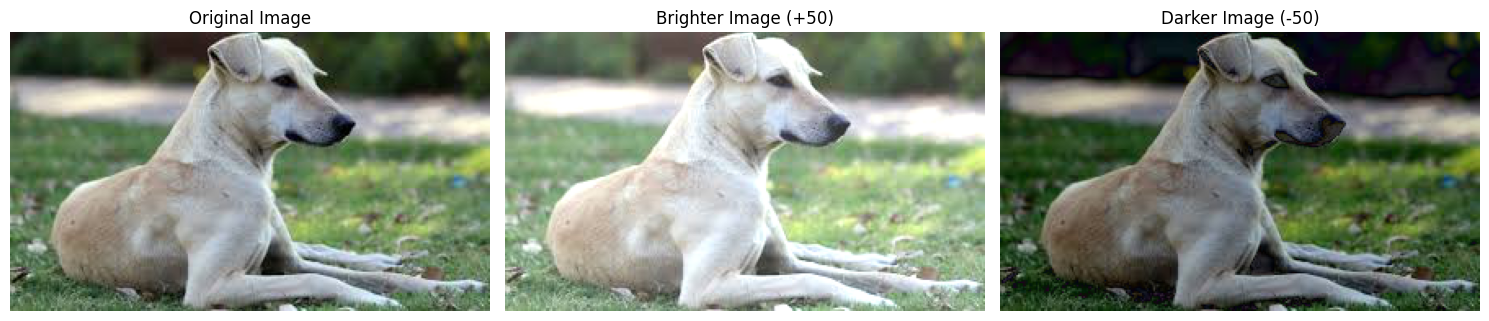

In [21]:
import cv2
import matplotlib.pyplot as plt

# Function to adjust brightness
def adjust_brightness(img, beta):
    """
    Adjusts the brightness of the image by adding a scalar value to all pixels.
    :param img: Input image
    :param beta: Brightness adjustment value (positive for brighter, negative for darker)
    :return: Brightness-adjusted image
    """
    return cv2.convertScaleAbs(img, alpha=1, beta=beta)

# Load the image
image_path = "dog.jpg"
img_bgr = cv2.imread(image_path)

# Check if the image is loaded
if img_bgr is None:
    print("Error: Unable to load the image. Please check the path.")
else:
    # Convert BGR to RGB for matplotlib display
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

    # Adjust brightness
    brighter_image = adjust_brightness(img_rgb, beta=50)  # Increase brightness by 50
    darker_image = adjust_brightness(img_rgb, beta=-50)   # Decrease brightness by 50

    # Display the original, brighter, and darker images
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(img_rgb)
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 3, 2)
    plt.imshow(brighter_image)
    plt.title("Brighter Image (+50)")
    plt.axis("off")

    plt.subplot(1, 3, 3)
    plt.imshow(darker_image)
    plt.title("Darker Image (-50)")
    plt.axis("off")

    plt.tight_layout()
    plt.show()


In [22]:
#Q2 Modify the contrast of the image using various filter and compare their result.

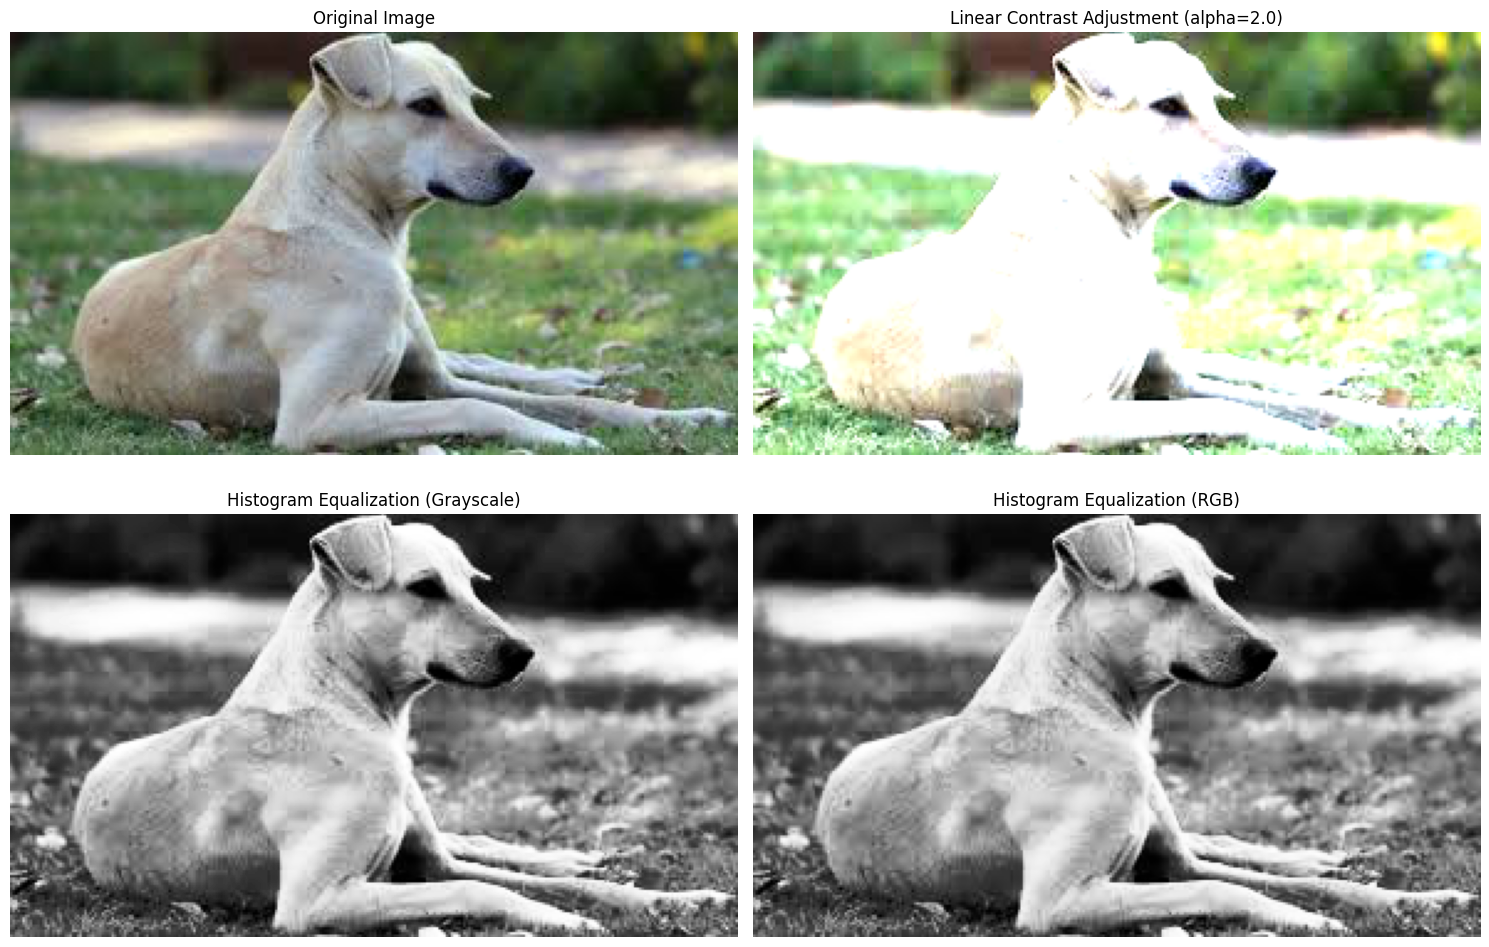

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "dog.jpg"
img_bgr = cv2.imread(image_path)

# Check if the image is loaded
if img_bgr is None:
    print("Error: Unable to load the image. Please check the path.")
else:
    # Convert BGR to RGB for matplotlib display
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    
    # Convert to grayscale for histogram equalization
    img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

    # 1. Linear Contrast Adjustment
    # Scale pixel values linearly to increase contrast
    alpha = 2.0  # Contrast control (>1 increases contrast)
    beta = 0     # Brightness control
    linear_contrast = cv2.convertScaleAbs(img_rgb, alpha=alpha, beta=beta)

    # 2. Histogram Equalization
    # Apply to grayscale image
    hist_eq_gray = cv2.equalizeHist(img_gray)
    # Convert back to RGB for visualization
    hist_eq_rgb = cv2.cvtColor(hist_eq_gray, cv2.COLOR_GRAY2RGB)

    # Display results
    plt.figure(figsize=(15, 10))

    # Original Image
    plt.subplot(2, 2, 1)
    plt.imshow(img_rgb)
    plt.title("Original Image")
    plt.axis("off")

    # Linear Contrast Adjustment
    plt.subplot(2, 2, 2)
    plt.imshow(linear_contrast)
    plt.title("Linear Contrast Adjustment (alpha=2.0)")
    plt.axis("off")

    # Grayscale Image (Histogram Equalization Result)
    plt.subplot(2, 2, 3)
    plt.imshow(hist_eq_gray, cmap="gray")
    plt.title("Histogram Equalization (Grayscale)")
    plt.axis("off")

    # Histogram Equalization (RGB Visualization)
    plt.subplot(2, 2, 4)
    plt.imshow(hist_eq_rgb)
    plt.title("Histogram Equalization (RGB)")
    plt.axis("off")

    plt.tight_layout()
    plt.show()


In [24]:
#Q3 Remove noise from the image using linear filter.

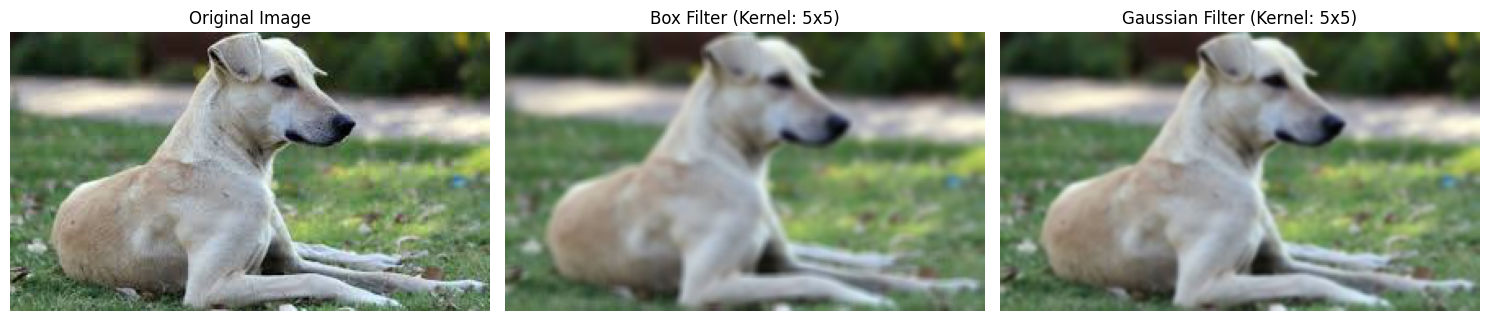

In [25]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image_path = "dog.jpg"
img_bgr = cv2.imread(image_path)

# Check if the image is loaded
if img_bgr is None:
    print("Error: Unable to load the image. Please check the path.")
else:
    # Convert BGR to RGB for matplotlib display
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

    # Apply Box Filter
    kernel_size = (5, 5)  # Size of the kernel
    box_filtered = cv2.boxFilter(img_rgb, ddepth=-1, ksize=kernel_size, normalize=True)

    # Apply Gaussian Filter
    gaussian_filtered = cv2.GaussianBlur(img_rgb, ksize=(5, 5), sigmaX=0)

    # Display original, box filtered, and Gaussian filtered images
    plt.figure(figsize=(15, 5))

    # Original Image
    plt.subplot(1, 3, 1)
    plt.imshow(img_rgb)
    plt.title("Original Image")
    plt.axis("off")

    # Box Filtered Image
    plt.subplot(1, 3, 2)
    plt.imshow(box_filtered)
    plt.title("Box Filter (Kernel: 5x5)")
    plt.axis("off")

    # Gaussian Filtered Image
    plt.subplot(1, 3, 3)
    plt.imshow(gaussian_filtered)
    plt.title("Gaussian Filter (Kernel: 5x5)")
    plt.axis("off")

    plt.tight_layout()
    plt.show()


In [26]:
#Q4 Remove noise from the image using non linear filter.

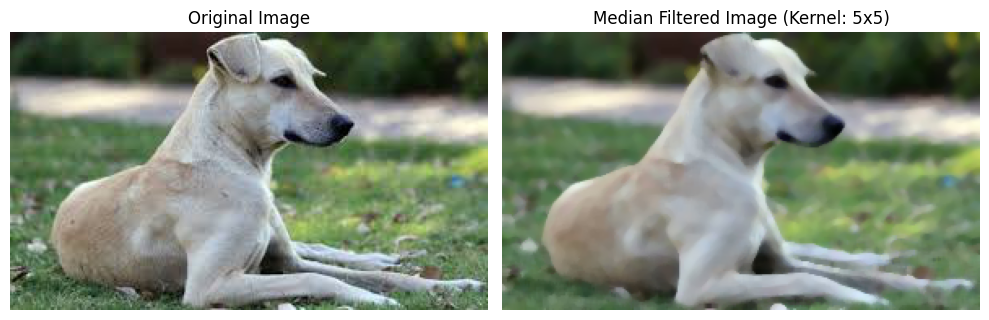

In [27]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image_path = "dog.jpg"
img_bgr = cv2.imread(image_path)

# Check if the image is loaded
if img_bgr is None:
    print("Error: Unable to load the image. Please check the path.")
else:
    # Convert BGR to RGB for matplotlib display
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

    # Apply Median Filter (Non-Linear Filter)
    kernel_size = 5  # Kernel size must be an odd number
    median_filtered = cv2.medianBlur(img_rgb, kernel_size)

    # Display original and filtered images
    plt.figure(figsize=(10, 5))

    # Original Image
    plt.subplot(1, 2, 1)
    plt.imshow(img_rgb)
    plt.title("Original Image")
    plt.axis("off")

    # Median Filtered Image
    plt.subplot(1, 2, 2)
    plt.imshow(median_filtered)
    plt.title(f"Median Filtered Image (Kernel: {kernel_size}x{kernel_size})")
    plt.axis("off")

    plt.tight_layout()
    plt.show()


In [28]:
#Q5 Identify the edge of the image using appropriate filter.

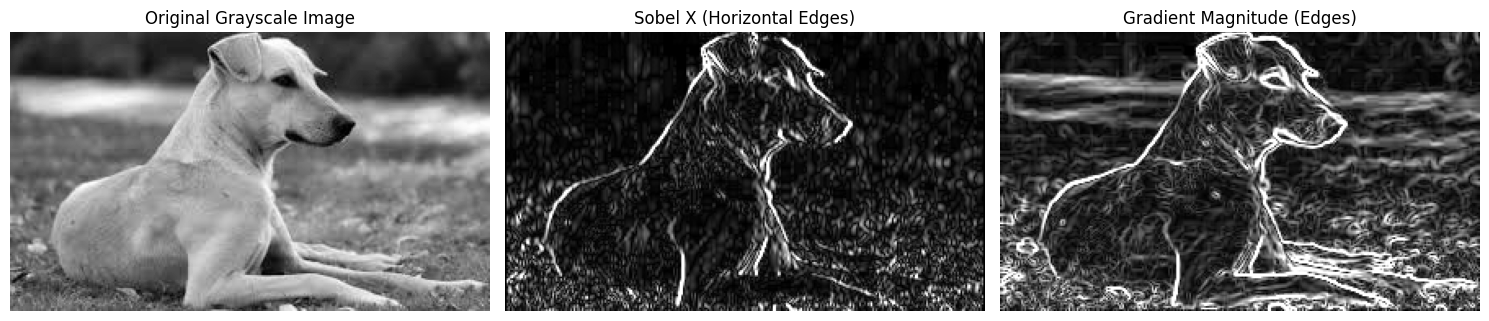

In [29]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image_path = "dog.jpg"
img_bgr = cv2.imread(image_path)

# Check if the image is loaded
if img_bgr is None:
    print("Error: Unable to load the image. Please check the path.")
else:
    # Convert to grayscale for edge detection
    img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

    # Apply Sobel filter to find edges in the x and y directions
    sobel_x = cv2.Sobel(img_gray, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=3)  # Gradient in x
    sobel_y = cv2.Sobel(img_gray, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=3)  # Gradient in y

    # Compute the magnitude of the gradient
    sobel_magnitude = cv2.magnitude(sobel_x, sobel_y)

    # Normalize to display as an 8-bit image
    sobel_magnitude = cv2.convertScaleAbs(sobel_magnitude)

    # Display results
    plt.figure(figsize=(15, 5))

    # Original Grayscale Image
    plt.subplot(1, 3, 1)
    plt.imshow(img_gray, cmap="gray")
    plt.title("Original Grayscale Image")
    plt.axis("off")

    # Sobel X
    plt.subplot(1, 3, 2)
    plt.imshow(cv2.convertScaleAbs(sobel_x), cmap="gray")
    plt.title("Sobel X (Horizontal Edges)")
    plt.axis("off")

    # Sobel Magnitude
    plt.subplot(1, 3, 3)
    plt.imshow(sobel_magnitude, cmap="gray")
    plt.title("Gradient Magnitude (Edges)")
    plt.axis("off")

    plt.tight_layout()
    plt.show()
